In [20]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [2]:
data_train = pd.read_csv("train.csv")
print(data_train.head())

       vidid  adview    views likes dislikes comment   published duration  \
0  VID_18655      40  1031602  8523      363    1095  2016-09-14  PT7M37S   
1  VID_14135       2     1707    56        2       6  2016-10-01  PT9M30S   
2   VID_2187       1     2023    25        0       2  2016-07-02  PT2M16S   
3  VID_23096       6   620860   777      161     153  2016-07-27  PT4M22S   
4  VID_10175       1      666     1        0       0  2016-06-29    PT31S   

  category  
0        F  
1        D  
2        C  
3        H  
4        D  


In [3]:
data_train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [4]:
data_train.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [5]:
data_train.shape

(14999, 9)

In [6]:
data_train.tail()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G
14998,VID_8534,1,15212,22,5,4,2016-02-19,PT1M1S,D


In [7]:
data_train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

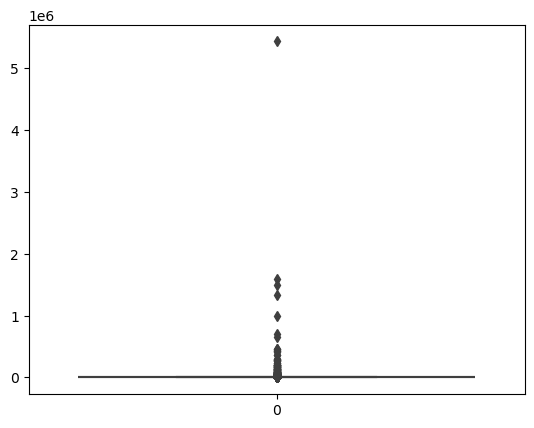

In [8]:
sns.boxplot(data_train["adview"]);

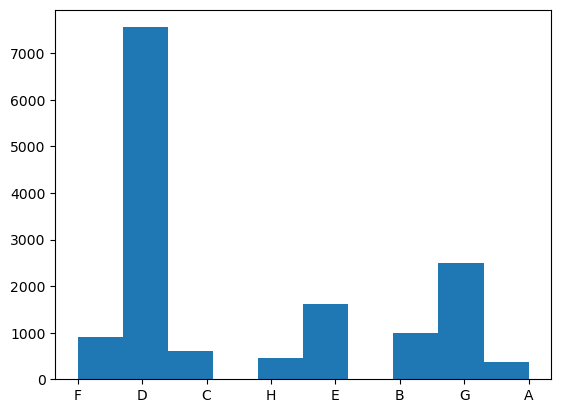

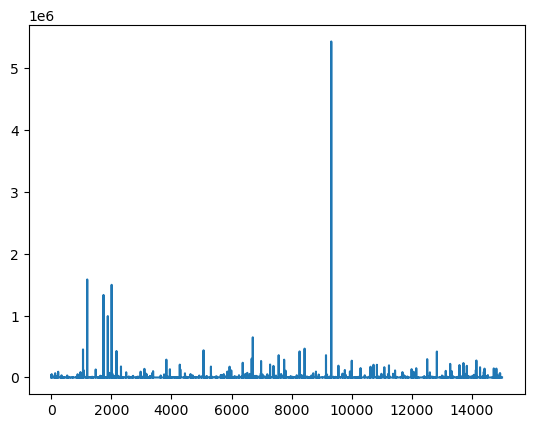

In [9]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

In [10]:
data_train = data_train.drop("vidid",axis=1)

In [11]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,1,666,1,0,0,2016-06-29,PT31S,D


In [12]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,1,666,1,0,0,2016-06-29,PT31S,4


In [13]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])


In [14]:
# Convert Time_in_sec for duration
import datetime
import time

In [15]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H', 'M', 'S']
    for i in y:
        if i not in P:
            mm += i
        else:
            if i == "H":
                h = mm
                mm = ''
            elif i == "M":
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if h == '':
        h = '00'
    if m == '':
        m = '00'
    if s == '':
        s = '00'
    bp = h + ':' + m + ':' + s
    return bp

train = pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1 = time.apply(func_sec)
data_train["duration"] = time1

In [21]:
label_encoder = LabelEncoder()
data_train['published'] = label_encoder.fit_transform(data_train['published'])
data_train.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2168,457,6
1,2,1707,56,2,6,2185,570,4
2,1,2023,25,0,2,2094,136,3
3,6,620860,777,161,153,2119,262,8
4,1,666,1,0,0,2091,31,4


In [22]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
#data_train=data_train.drop(["adview"],axis=1)
#data_train=data_train.drop(["published"],axis=1)

data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.25, random_state=120)
print(X_train.shape)
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

(10977, 8)


0.15264798459507414

In [23]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [24]:
#Linear regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 257962.70473772066
Mean Squared Error: 1333396281706.9548
Root Mean Squared Error: 1154727.795502886


In [25]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 257962.70473772066
Mean Squared Error: 1333396281706.9548
Root Mean Squared Error: 1154727.795502886


In [26]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)


Mean Absolute Error: 257829.73599344085
Mean Squared Error: 1320653652181.4316
Root Mean Squared Error: 1149196.9596990028


In [30]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 50
min_samples_split=8
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split,min_samples_leaf=2)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 262914.2581730912
Mean Squared Error: 2028890947345.0144
Root Mean Squared Error: 1424391.4305221771


In [32]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
    Dense(6, activation="relu",
    input_shape=X_train.shape[1:]),
    Dense(6,activation="relu"),
    Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

ann.summary()
print_error(X_test,y_test,ann)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 54        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
115/115 [==============================] - 0s 2ms/step
Mean Absolute Error: 710622.3627699241
Mean Squared Error: 10118332940897.12
Root Mean Squared Error: 3180932.7155564167


In [34]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [43]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([419560., 255555.,   4732., ..., 986836., 205717.,   6769.])

In [44]:
predictions_df = pd.DataFrame({'Predictions': y_pred})
predictions_df.to_csv('PredictdAdView.csv', index=False)
